强化学习的三个要素：观测值、采取的动作和奖惩....

整个过程就是，机器与环境的互动，外加人为定义的奖惩机制，如基于policy，value，和model的策略...

强化学习与监督式学习的不同，就是它是从经验中自己习得，而就AlphoGo来说，它是江都市学习+强化学习...

再比如chat-bot的训练...

现在应用较多的领域，就是让其玩游戏...

强化学习的关键，是要让其有探索的能力，而不只是就得到reward高的动作的连续...

而这个实现的方法之一就是A3C，基于policy就学习如何采取行动，而基于value学习来评估actor...

learn a actor

输入比如是一帧图像，输出是actions的概率分布，目标就是，比如是玩N轮游戏的最终reward总和最大（每轮T次）...

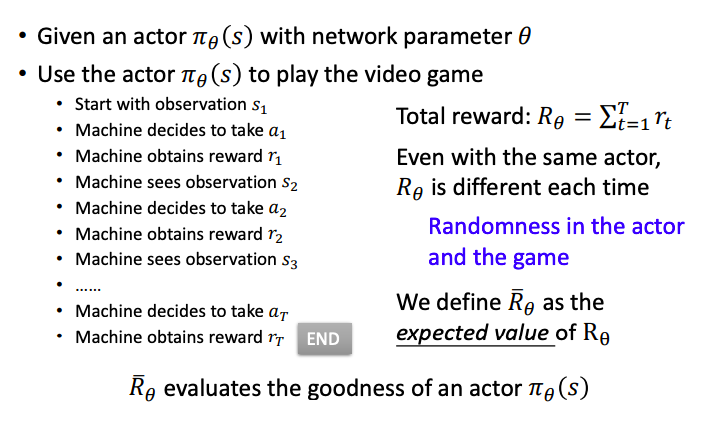
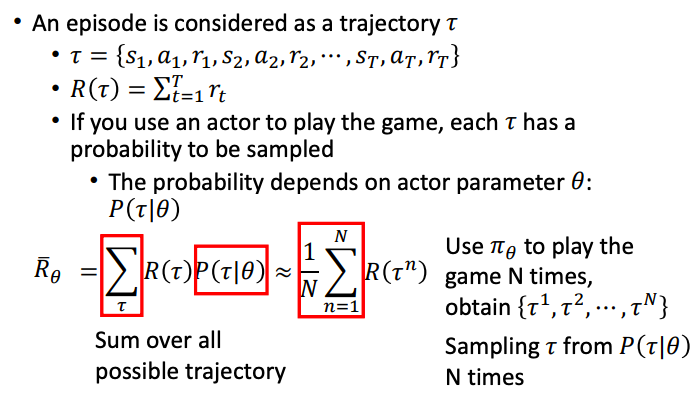

假定共玩N轮，每轮从$P(\tau|\theta)$从sample一个$\tau$

该如何求解呢，梯度上升法：

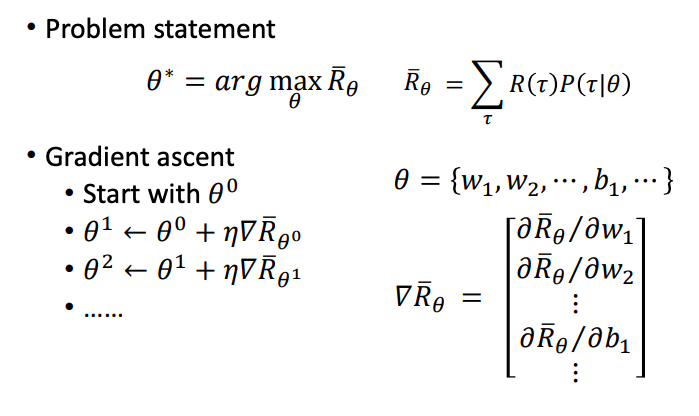
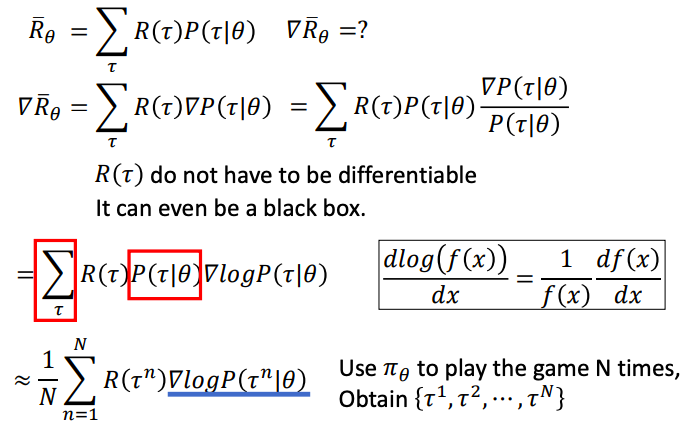
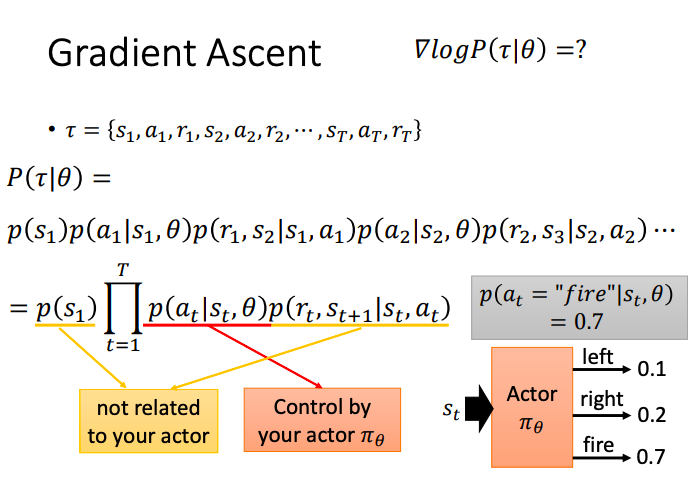
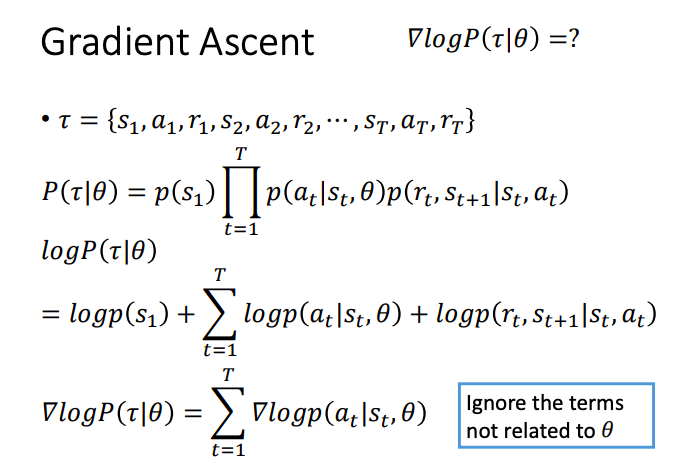
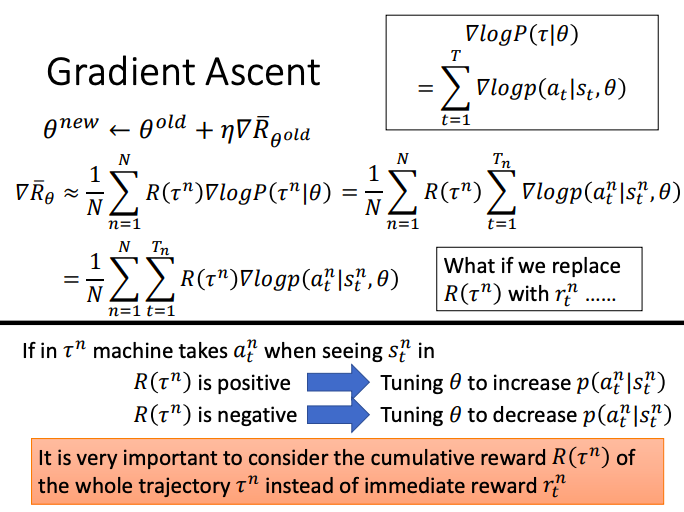

> 说明：这边的$R(\tau^n)$是在每轮中每次采取各种动作得到的分数，包括得到的低分，高分等，而不只是所有的高分，这是一个很直观的理解，也相当于是一个权重...

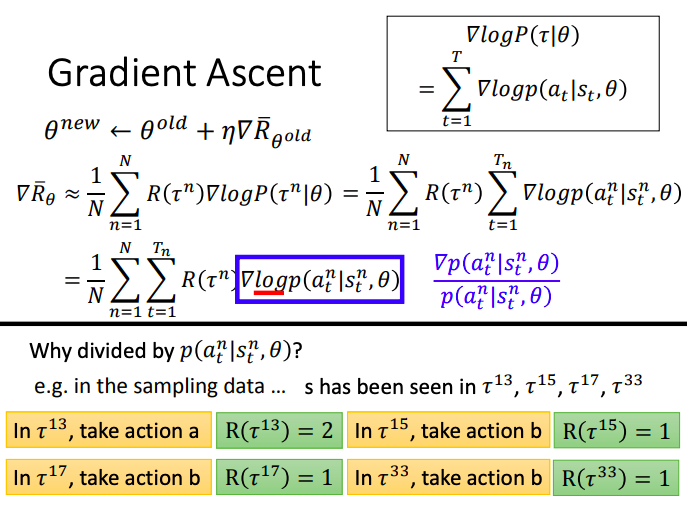

> 说明：对于公式中存在的log项的解释，它是防止在每轮中出现多次同样的观测值采取不同动作得到分数的差异性，而导致降低应该得到高分而没有采取这类动作的情形，正如图中说明的那样...

如果所有得到的分数都是正数，实际中如果没有被sample到的，概率就会被减小，那下次被sample的概率就更小，这是有问题的，那么就增加一个bias来调整，只有超过baseline的概率会增加，小于的则会被减小，这样就大大减少了因没有被sample到而一直被忽略掉，至少有一个标准，你还是有机会再下次被sample到的...

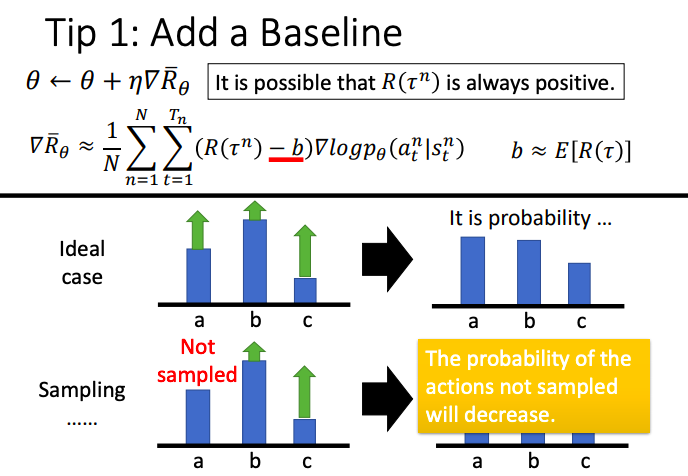

即便添加了bias也会存在一些问题，按照公式$R(\tau^n)-b$这个值是每轮分数的总和，而对于这轮中的所有游戏次数并不能用这个总和来评估，比如说总和分数是正的，但是这轮中的有些是正值，有些是负值，正值后突然出现负值的，这个直觉上应该减少它出现的概率，即应乘以一个小的reward权重，所以对此情形，应该给予合适的权重，那该如何设定呢？就是在出现负值后，改变成乘以出现负值的这个reward，而在再次出现正值后，再乘以正值的reward...（如果reward都为正，理论上感觉应该更高的提升概率，低的减低概率，实际train的时候可能并非如此，所以我们还是希望能够给定一个机制使得reward有负，有正，这样才能更好地train）

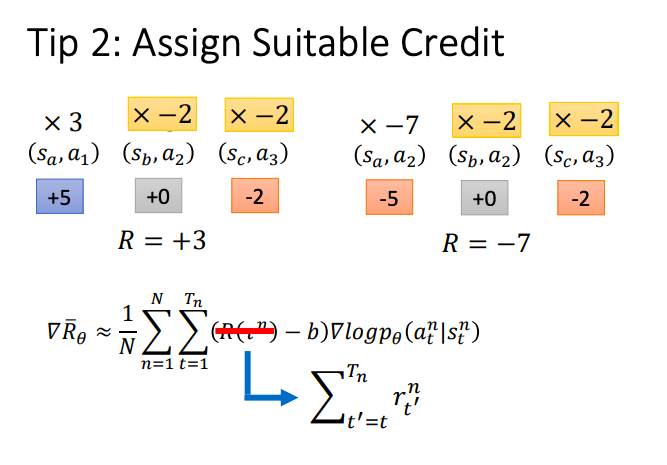
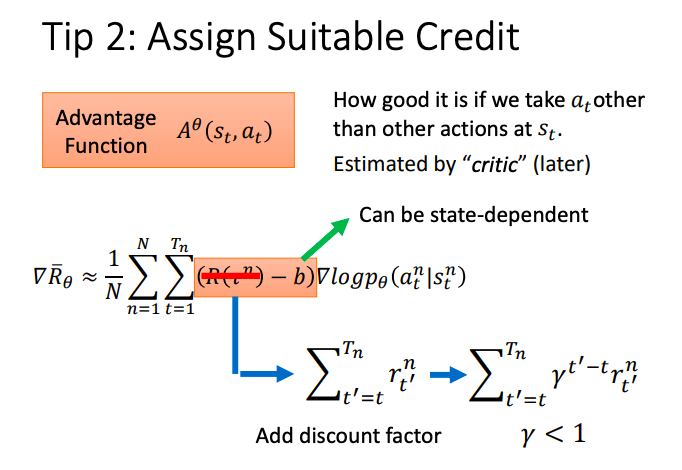

policy gradient

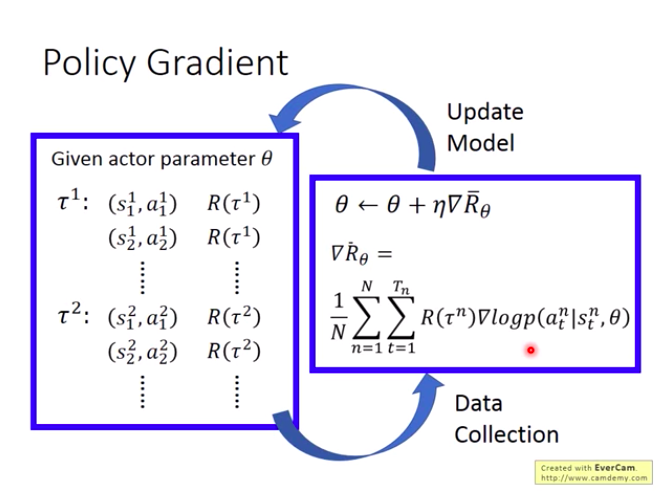

强化学习中实践中，需要不断重复N轮，比如游戏，这才能有好的结果...

这里要注意的是，强化学习它是概率分布的一种近似表示，假定在给定参数$\theta$，我们从$p(\tau|\theta)$sample出N个$\tau$，我们期望找到这个分布中能够实现分数最大化的参数$\theta$，也就是我们通过多轮实验得到的状态数据s，以及每次采取的行动，这些作为满足这个分布的观测数据，它是一种近似推断...